По мотивам https://www.kaggle.com/c/employee-resignation

In [224]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('training_data.csv')

In [3]:
data.tail()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
2641,22,Non-Travel,Sales,18.0,2,Marketing,Male,Sales Executive,Married,97890.0,1.0,18,8.0,2,4.0,3.0,4,1,3,0
2642,39,Travel_Rarely,Sales,4.0,4,Marketing,Female,Laboratory Technician,Single,26100.0,7.0,12,8.0,0,9.0,2.0,4,2,2,0
2643,36,Travel_Rarely,Research & Development,2.0,3,Medical,Female,Manufacturing Director,Divorced,175670.0,5.0,13,8.0,0,7.0,6.0,1,0,0,0
2644,39,Non-Travel,Research & Development,8.0,5,Medical,Female,Sales Representative,Married,188240.0,6.0,19,8.0,1,10.0,4.0,3,1,2,0
2645,24,Travel_Rarely,Sales,10.0,2,Marketing,Male,Manufacturing Director,Divorced,23560.0,0.0,13,8.0,0,2.0,5.0,1,0,0,0


In [5]:
pandas_profiling.ProfileReport(data)

C:\conda2020\lib\site-packages\pandas_profiling\model\correlations.py:35: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr - 1.0), (rcorr - 1.0)))


In [ ]:
YearsWithCurrManager - неадекватные значения
дубликаты 
неинформативный признак

In [21]:
num_data = data._get_numeric_data()
num_data.head()

,Age,DistanceFromHome,Education,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,36,5.0,3,54050.0,4.0,14,8.0,0,10.0,2.0,8,7,104,0
1,45,3.0,3,60740.0,0.0,14,8.0,0,9.0,2.0,8,3,1,0
2,51,23.0,3,192720.0,9.0,20,8.0,0,18.0,2.0,10,2,7,1
3,47,15.0,4,65530.0,0.0,15,8.0,0,8.0,2.0,7,7,7,0
4,34,21.0,3,57704.0,3.0,117,8.0,1,7.0,4.0,0,0,0,0


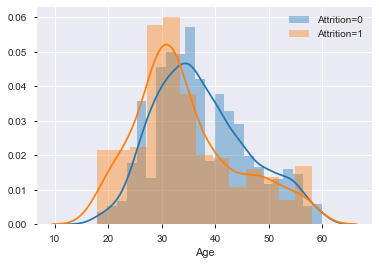

In [44]:
sns.distplot(num_data.Age[num_data.Attrition==0], label='Attrition=0')
sns.distplot(num_data.Age[num_data.Attrition==1], label='Attrition=1')
plt.legend()

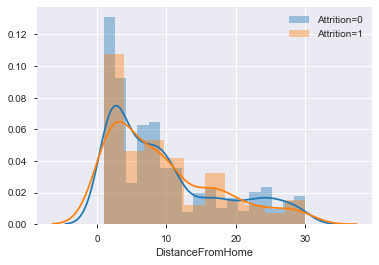

In [45]:
sns.distplot(num_data.DistanceFromHome[num_data.Attrition==0], label='Attrition=0')
sns.distplot(num_data.DistanceFromHome[num_data.Attrition==1], label='Attrition=1')
plt.legend()

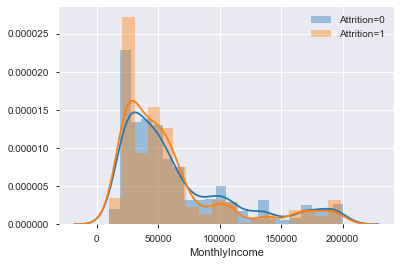

In [46]:
sns.distplot(num_data.MonthlyIncome[num_data.Attrition==0], label='Attrition=0')
sns.distplot(num_data.MonthlyIncome[num_data.Attrition==1], label='Attrition=1')
plt.legend()

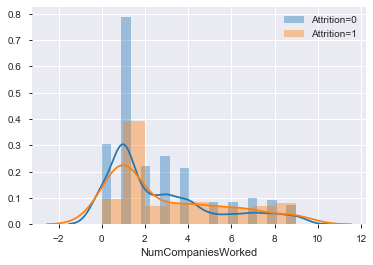

In [47]:
sns.distplot(num_data.NumCompaniesWorked[num_data.Attrition==0], label='Attrition=0')
sns.distplot(num_data.NumCompaniesWorked[num_data.Attrition==1], label='Attrition=1')
plt.legend()

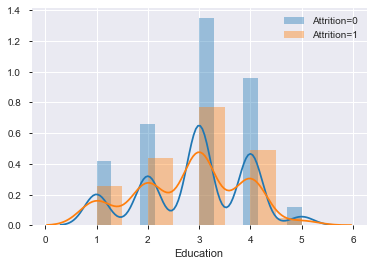

In [58]:
sns.distplot(num_data.Education[num_data.Attrition==0], label='Attrition=0')
sns.distplot(num_data.Education[num_data.Attrition==1], label='Attrition=1')
plt.legend()

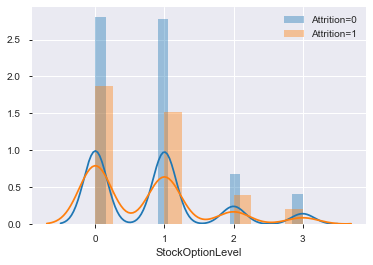

In [64]:
sns.distplot(num_data.StockOptionLevel[num_data.Attrition==0], label='Attrition=0')#, norm_hist=True)
sns.distplot(num_data.StockOptionLevel[num_data.Attrition==1], label='Attrition=1')#, norm_hist=True)
plt.legend()

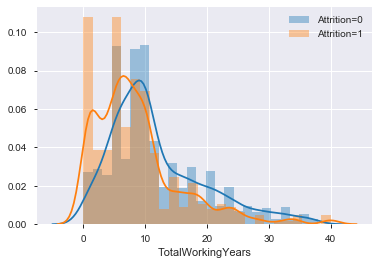

In [65]:
sns.distplot(num_data.TotalWorkingYears[num_data.Attrition==0], label='Attrition=0')#, norm_hist=True)
sns.distplot(num_data.TotalWorkingYears[num_data.Attrition==1], label='Attrition=1')#, norm_hist=True)
plt.legend()

Тут можно заметить, что чем больше трудовой стаж у человека, тем менее склонен он к увольнению. Справа видим, что люди со стажем более 40 лет более склонны к увольнению (вероятно по причине выхода на пенсию)

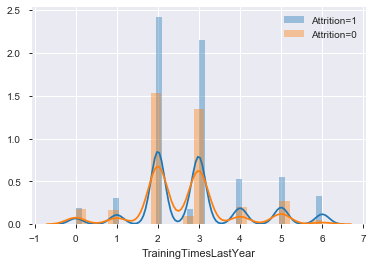

In [66]:
sns.distplot(num_data.TrainingTimesLastYear[num_data.Attrition==0], label='Attrition=1')
sns.distplot(num_data.TrainingTimesLastYear[num_data.Attrition==1], label='Attrition=0')
plt.legend()

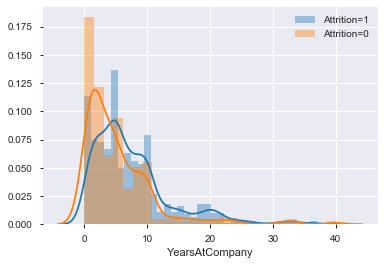

In [67]:
sns.distplot(num_data.YearsAtCompany[num_data.Attrition==0], label='Attrition=1')
sns.distplot(num_data.YearsAtCompany[num_data.Attrition==1], label='Attrition=0')
plt.legend()

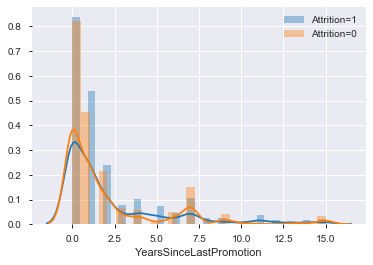

In [69]:
sns.distplot(num_data.YearsSinceLastPromotion[num_data.Attrition==0], label='Attrition=1')
sns.distplot(num_data.YearsSinceLastPromotion[num_data.Attrition==1], label='Attrition=0')
plt.legend()

(0, 25)

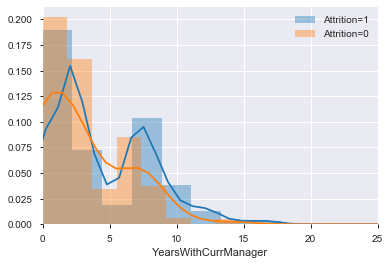

In [76]:
sns.distplot(num_data.YearsWithCurrManager[num_data.Attrition==0], label='Attrition=1')
sns.distplot(num_data.YearsWithCurrManager[num_data.Attrition==1], label='Attrition=0')
plt.legend()
plt.xlim(0,25) # т.к. данные не адекватны

In [97]:
data.drop_duplicates()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,36,Travel_Rarely,Sales,5.0,3,Technical Degree,Male,Sales Executive,Single,54050.0,4.0,14,8.0,0,10.0,2.0,8,7,104,0
1,45,Travel_Rarely,Sales,3.0,3,Life Sciences,Male,Healthcare Representative,Single,60740.0,0.0,14,8.0,0,9.0,2.0,8,3,1,0
2,51,Travel_Rarely,Sales,23.0,3,Medical,Female,Research Scientist,Married,192720.0,9.0,20,8.0,0,18.0,2.0,10,2,7,1
3,47,Travel_Rarely,Sales,15.0,4,Marketing,Female,Research Director,Married,65530.0,0.0,15,8.0,0,8.0,2.0,7,7,7,0
4,34,Travel_Rarely,Research & Development,21.0,3,Medical,Female,Laboratory Technician,Divorced,57704.0,3.0,117,8.0,1,7.0,4.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2638,28,Travel_Rarely,Research & Development,1.0,4,Life Sciences,Male,Research Director,Single,100960.0,5.0,13,8.0,0,6.0,2.0,4,0,3,1
2641,22,Non-Travel,Sales,18.0,2,Marketing,Male,Sales Executive,Married,97890.0,1.0,18,8.0,2,4.0,3.0,4,1,3,0
2642,39,Travel_Rarely,Sales,4.0,4,Marketing,Female,Laboratory Technician,Single,26100.0,7.0,12,8.0,0,9.0,2.0,4,2,2,0
2643,36,Travel_Rarely,Research & Development,2.0,3,Medical,Female,Manufacturing Director,Divorced,175670.0,5.0,13,8.0,0,7.0,6.0,1,0,0,0


In [128]:
cat_data = data[data.duplicated(keep=False)][data.Age==31][data.Education==4]
cat_data.head()

C:\conda2020\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
45,31,Travel_Rarely,Research & Development,17.0,4,Life Sciences,Male,Human Resources,Single,42440.0,9.0,13,8.0,0,8.0,3.0,3,0,2,0
230,31,Travel_Rarely,Research & Development,3.0,4,Life Sciences,Female,Sales Executive,Divorced,29090.0,9.0,14,8.0,2,10.0,2.0,5,0,1,0
615,31,Non-Travel,Research & Development,9.0,4,Life Sciences,Female,Sales Executive,Single,147320.0,0.0,12,8.0,0,10.0,3.0,9,1,7,0
1073,31,Travel_Rarely,Research & Development,3.0,4,Life Sciences,Female,Sales Executive,Divorced,29090.0,9.0,14,8.0,2,10.0,2.0,5,0,1,0
1302,31,Travel_Rarely,Research & Development,17.0,4,Life Sciences,Male,Human Resources,Single,42440.0,9.0,13,8.0,0,8.0,3.0,3,0,2,0


In [142]:
cat_data = pd.concat([data.select_dtypes(include='object'), data.Attrition], axis=1)
cat_data.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Attrition
0,Travel_Rarely,Sales,Technical Degree,Male,Sales Executive,Single,0
1,Travel_Rarely,Sales,Life Sciences,Male,Healthcare Representative,Single,0
2,Travel_Rarely,Sales,Medical,Female,Research Scientist,Married,1
3,Travel_Rarely,Sales,Marketing,Female,Research Director,Married,0
4,Travel_Rarely,Research & Development,Medical,Female,Laboratory Technician,Divorced,0


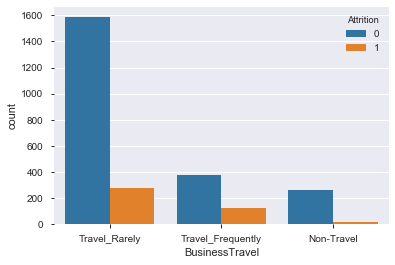

In [146]:
sns.countplot(x='BusinessTravel',data=cat_data, hue='Attrition')

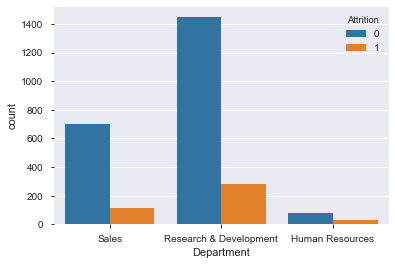

In [148]:
sns.countplot(x='Department',data=cat_data, hue='Attrition')

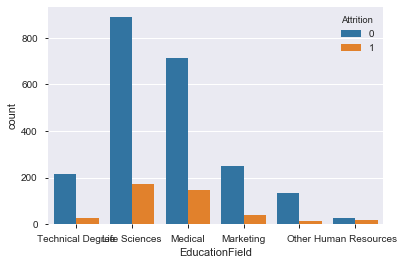

In [149]:
sns.countplot(x='EducationField',data=cat_data, hue='Attrition')

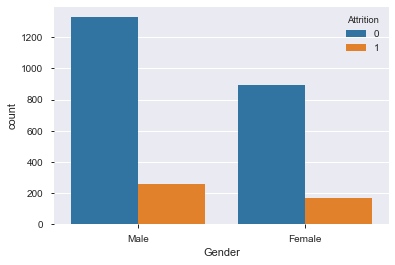

In [150]:
sns.countplot(x='Gender',data=cat_data, hue='Attrition')

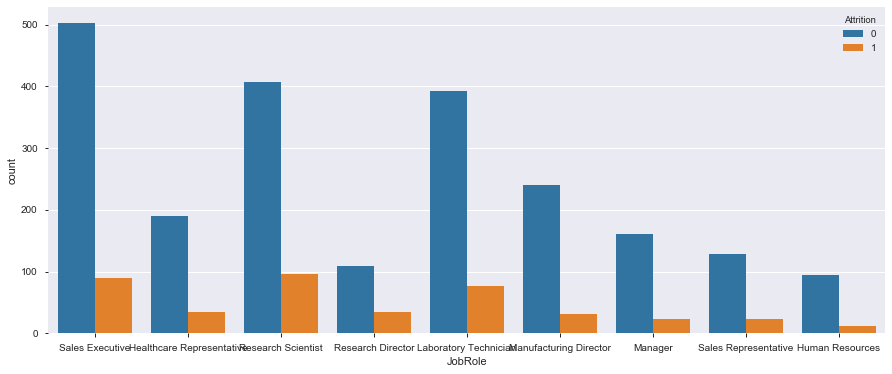

In [155]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(x='JobRole',data=cat_data, hue='Attrition')

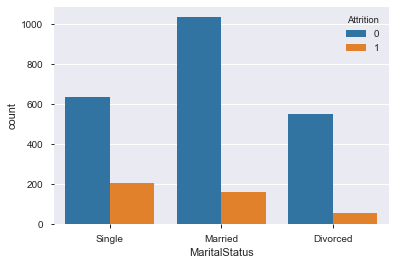

In [156]:
sns.countplot(x='MaritalStatus',data=cat_data, hue='Attrition')

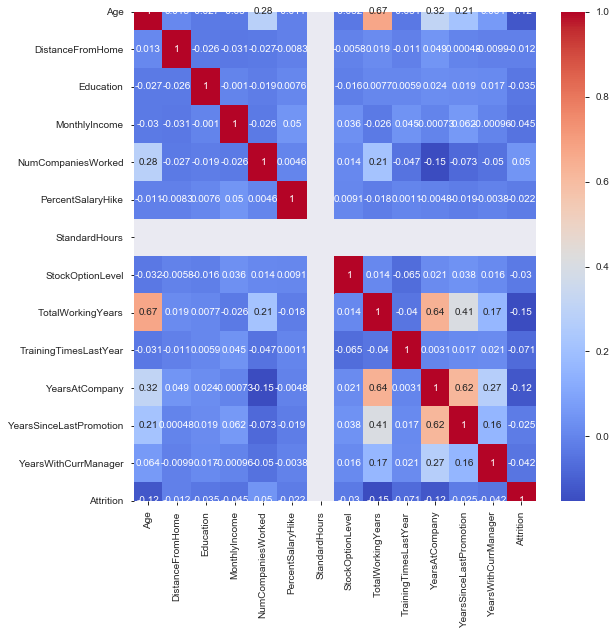

In [164]:
f, ax = plt.subplots(figsize=(9,9))
sns.heatmap(num_data.corr(), 
           annot= True, cmap='coolwarm')

# BaseLine

In [259]:
from sklearn.model_selection import train_test_split


from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer

In [260]:
y = data.Attrition
X = pd.get_dummies(data.drop(labels='Attrition', axis=1))

In [261]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y)

In [262]:
xtrain.shape, ytrain.shape, ytest.shape

((1984, 39), (1984,), (662,))

## 2.1 Логистическая регрессия

In [266]:
baseline_model = Pipeline([('scaler', StandardScaler()), 
                           ('logreg', LogisticRegression())])

In [267]:
baseline_model.fit(xtrain, ytrain)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logreg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [268]:
roc_auc_score(ytest, baseline_model.predict(xtest))

0.5491431866864394

так себе результат

## 2.2 RandomForest

In [228]:
from sklearn.ensemble import RandomForestClassifier

In [229]:
rf_model = RandomForestClassifier()

In [230]:
rf_model.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [231]:
roc_auc_score(ytest, rf_model.predict(xtest))

0.8100986569245161

Уже лучше

## 2.3 GradientBoosting

In [232]:
from sklearn.ensemble import GradientBoostingClassifier

In [254]:
gb_model = GradientBoostingClassifier(n_estimators=900)

In [255]:
gb_model.fit(xtrain, ytrain)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=900,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [256]:
roc_auc_score(ytest, gb_model.predict(xtest))

0.836730731896719

# Улучшаем модель

In [272]:
upgradeData = data.copy()
upgradeData = upgradeData.drop_duplicates()
target = upgradeData.Attrition
upgradeData = upgradeData.drop(labels=['StandardHours', 'Attrition'], axis=1)

In [274]:
upgradeData.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,36,Travel_Rarely,Sales,5.0,3,Technical Degree,Male,Sales Executive,Single,54050.0,4.0,14,0,10.0,2.0,8,7,104
1,45,Travel_Rarely,Sales,3.0,3,Life Sciences,Male,Healthcare Representative,Single,60740.0,0.0,14,0,9.0,2.0,8,3,1
2,51,Travel_Rarely,Sales,23.0,3,Medical,Female,Research Scientist,Married,192720.0,9.0,20,0,18.0,2.0,10,2,7
3,47,Travel_Rarely,Sales,15.0,4,Marketing,Female,Research Director,Married,65530.0,0.0,15,0,8.0,2.0,7,7,7
4,34,Travel_Rarely,Research & Development,21.0,3,Medical,Female,Laboratory Technician,Divorced,57704.0,3.0,117,1,7.0,4.0,0,0,0


In [283]:
upgradeData.Gender = upgradeData.Gender.apply(lambda x: 1 if x=='Male' else 0)

In [291]:
num_upgradeData = upgradeData._get_numeric_data()
cat_upgradeData = upgradeData.drop(labels=num_upgradeData.columns, axis=1)

In [293]:
cat_upgradeData = pd.get_dummies(cat_upgradeData)

In [321]:
bigX = pd.concat([cat_upgradeData, num_upgradeData], axis=1)
bigX.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,Gender,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,0,0,1,0,0,1,0,0,0,0,...,1,54050.0,4.0,14,0,10.0,2.0,8,7,104
1,0,0,1,0,0,1,0,1,0,0,...,1,60740.0,0.0,14,0,9.0,2.0,8,3,1
2,0,0,1,0,0,1,0,0,0,1,...,0,192720.0,9.0,20,0,18.0,2.0,10,2,7
3,0,0,1,0,0,1,0,0,1,0,...,0,65530.0,0.0,15,0,8.0,2.0,7,7,7
4,0,0,1,0,1,0,0,0,0,1,...,0,57704.0,3.0,117,1,7.0,4.0,0,0,0


In [334]:
xtr, xtst, ytr, ytst = train_test_split(bigX, target)

In [331]:
scaler = Normalizer()
xtr = scaler.fit_transform(xtr)
xtst = scaler.transform(xtst)

In [346]:
gb = GradientBoostingClassifier(n_estimators=900, learning_rate=0.1)
gb.fit(xtr, ytr)
roc_auc_score(ytst, gb.predict(xtst))

0.7725401538669187

XGBOOST, CATBOOST

In [348]:
from catboost import CatBoostClassifier

In [458]:
cboost = CatBoostClassifier(
                iterations=1000,
                learning_rate=0.15,
                loss_function='Logloss',
                verbose=150,
                custom_loss=['AUC', 'Precision'],
                early_stopping_rounds=20)

In [459]:
cboost.fit(xtr, ytr,
          eval_set=(xtst, ytst),
          verbose=False,
          plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [377]:
roc_auc_score(ytst, cboost.predict(xtst))

0.7874769424573715

In [381]:
from xgboost import XGBClassifier

In [403]:
xgb = XGBClassifier(max_depth=9, 
                   learning_rate=0.1, 
                   n_estimators=1500)

In [404]:
xgb.fit(xtr, ytr)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=9, min_child_weight=1, missing=None,
       n_estimators=1500, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [405]:
roc_auc_score(ytst, xgb.predict(xtst))

0.825111351059522

# STACKING

In [406]:
from sklearn.ensemble import VotingClassifier

In [414]:
vt = VotingClassifier([('xgb', xgb), ('catboost', cboost), ('gb', gb_model)])

In [415]:
vt.fit(xtr, ytr)

0:	learn: 0.6132840	total: 9.48ms	remaining: 9.48s
5:	learn: 0.4198578	total: 30.4ms	remaining: 5.03s
10:	learn: 0.3563781	total: 46.2ms	remaining: 4.15s
15:	learn: 0.3275906	total: 54.8ms	remaining: 3.37s
20:	learn: 0.3039052	total: 63.6ms	remaining: 2.97s
25:	learn: 0.2859600	total: 73.5ms	remaining: 2.75s
30:	learn: 0.2623884	total: 83ms	remaining: 2.59s
35:	learn: 0.2510507	total: 92ms	remaining: 2.46s
40:	learn: 0.2350098	total: 101ms	remaining: 2.36s
45:	learn: 0.2171813	total: 110ms	remaining: 2.28s
50:	learn: 0.2029395	total: 119ms	remaining: 2.21s
55:	learn: 0.1873553	total: 127ms	remaining: 2.15s
60:	learn: 0.1738159	total: 136ms	remaining: 2.09s
65:	learn: 0.1617523	total: 145ms	remaining: 2.04s
70:	learn: 0.1482966	total: 153ms	remaining: 2s
75:	learn: 0.1368417	total: 161ms	remaining: 1.96s
80:	learn: 0.1269953	total: 169ms	remaining: 1.92s
85:	learn: 0.1200370	total: 178ms	remaining: 1.89s
90:	learn: 0.1104799	total: 191ms	remaining: 1.91s
95:	learn: 0.1014475	total: 201m

875:	learn: 0.0028324	total: 1.58s	remaining: 224ms
880:	learn: 0.0028058	total: 1.59s	remaining: 215ms
885:	learn: 0.0027934	total: 1.6s	remaining: 206ms
890:	learn: 0.0027723	total: 1.61s	remaining: 197ms
895:	learn: 0.0027573	total: 1.61s	remaining: 187ms
900:	learn: 0.0027423	total: 1.62s	remaining: 178ms
905:	learn: 0.0027248	total: 1.63s	remaining: 169ms
910:	learn: 0.0027013	total: 1.64s	remaining: 160ms
915:	learn: 0.0026886	total: 1.65s	remaining: 151ms
920:	learn: 0.0026786	total: 1.66s	remaining: 142ms
925:	learn: 0.0026515	total: 1.66s	remaining: 133ms
930:	learn: 0.0026275	total: 1.67s	remaining: 124ms
935:	learn: 0.0026036	total: 1.68s	remaining: 115ms
940:	learn: 0.0025838	total: 1.69s	remaining: 106ms
945:	learn: 0.0025630	total: 1.7s	remaining: 96.9ms
950:	learn: 0.0025372	total: 1.71s	remaining: 87.9ms
955:	learn: 0.0025152	total: 1.71s	remaining: 78.9ms
960:	learn: 0.0024919	total: 1.72s	remaining: 69.9ms
965:	learn: 0.0024861	total: 1.73s	remaining: 60.9ms
970:	lear

VotingClassifier(estimators=[('xgb', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=9, min_child_weight=1, missing=None,
       n_estimators=1500, n_jobs=1, nthread=None,
       objecti...    subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [416]:
roc_auc_score(ytst, vt.predict(xtst))

0.814358662887479

In [418]:
xtr.shape

(1710, 37)

# НЕЙРОНКА

In [450]:
xtr, xtst, ytr, ytst = train_test_split(bigX, target)
scaler = Normalizer()
xtr = scaler.fit_transform(xtr)
xtst = scaler.transform(xtst)

In [451]:
 
import tensorflow as tf

keras = tf.keras

In [452]:
m = keras.Sequential()
m.add(keras.layers.Input(37,))
m.add(keras.layers.Dense(90, activation='relu'))
m.add(keras.layers.BatchNormalization())
m.add(keras.layers.Dense(20, activation='relu'))
m.add(keras.layers.BatchNormalization())
m.add(keras.layers.Dense(10, activation='relu'))
m.add(keras.layers.Dense(2, activation='softmax'))

In [453]:
tf.keras.metrics.AUC()

In [454]:
m.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=[tf.keras.metrics.AUC()])

In [455]:
m.fit(x=xtr, y=keras.utils.to_categorical(ytr), validation_data=(xtst, keras.utils.to_categorical(ytst)), epochs=100)

Train on 1710 samples, validate on 571 samples
Epoch 1/100
1710/1710 [==============================] - 2s 1ms/sample - loss: 0.5271 - auc_12: 0.8338 - val_loss: 0.3942 - val_auc_12: 0.8682
Epoch 2/100
1710/1710 [==============================] - 0s 93us/sample - loss: 0.4579 - auc_12: 0.8467 - val_loss: 0.3999 - val_auc_12: 0.8669
Epoch 3/100
1710/1710 [==============================] - 0s 92us/sample - loss: 0.4466 - auc_12: 0.8643 - val_loss: 0.4725 - val_auc_12: 0.8669
Epoch 4/100
1710/1710 [==============================] - 0s 93us/sample - loss: 0.4414 - auc_12: 0.8685 - val_loss: 0.4066 - val_auc_12: 0.8658
Epoch 5/100
1710/1710 [==============================] - 0s 93us/sample - loss: 0.4389 - auc_12: 0.8767 - val_loss: 0.6586 - val_auc_12: 0.8669
Epoch 6/100
1710/1710 [==============================] - 0s 95us/sample - loss: 0.4360 - auc_12: 0.8743 - val_loss: 0.8701 - val_auc_12: 0.8669
Epoch 7/100
1710/1710 [==============================] - 0s 95us/sample - loss: 0.4323 - a

1710/1710 [==============================] - 0s 102us/sample - loss: 0.3794 - auc_12: 0.9092 - val_loss: 1.2223 - val_auc_12: 0.8667
Epoch 58/100
1710/1710 [==============================] - 0s 98us/sample - loss: 0.3830 - auc_12: 0.9075 - val_loss: 2.0470 - val_auc_12: 0.8669
Epoch 59/100
1710/1710 [==============================] - 0s 94us/sample - loss: 0.3803 - auc_12: 0.9088 - val_loss: 2.0470 - val_auc_12: 0.8669
Epoch 60/100
1710/1710 [==============================] - 0s 97us/sample - loss: 0.3860 - auc_12: 0.9065 - val_loss: 2.0470 - val_auc_12: 0.8669
Epoch 61/100
1710/1710 [==============================] - 0s 100us/sample - loss: 0.3764 - auc_12: 0.9110 - val_loss: 2.0470 - val_auc_12: 0.8669
Epoch 62/100
1710/1710 [==============================] - 0s 99us/sample - loss: 0.3844 - auc_12: 0.9068 - val_loss: 2.0470 - val_auc_12: 0.8669
Epoch 63/100
1710/1710 [==============================] - 0s 96us/sample - loss: 0.3839 - auc_12: 0.9072 - val_loss: 2.0470 - val_auc_12: 0.8

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,Gender,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
1634,0,0,1,0,1,0,0,0,0,1,...,0,105458.0,2.0,11,1,10.0,2.80932,3,0,52
1337,0,0,1,0,0,1,0,0,1,0,...,1,20460.0,4.0,22,3,10.0,4.00000,2,0,2
2371,0,0,1,0,1,0,0,1,0,0,...,1,167896.0,2.0,18,1,8.0,3.00000,3,1,2
301,0,0,1,0,1,0,0,1,0,0,...,0,154270.0,3.0,16,1,18.0,2.00000,1,0,0
1212,0,0,1,0,1,0,0,1,0,0,...,0,36460.0,1.0,14,0,10.0,3.00000,10,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2427,0,0,1,0,1,0,0,1,0,0,...,0,80200.0,3.0,11,1,23.0,2.00000,12,11,11
2606,0,0,1,0,1,0,0,0,0,0,...,1,34790.0,3.0,12,0,5.0,3.00000,3,0,2
1596,0,0,1,0,1,0,0,1,0,0,...,1,191970.0,1.0,12,0,1.0,2.00000,1,0,0
614,0,0,1,0,1,0,0,0,0,0,...,0,25140.0,3.0,11,0,15.0,2.00000,1,1,0
